# Lab Case Study

### Scenario

You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Business Objectives

- Retain customers,
- analyze relevant customer data,
- develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from ipywidgets import interactive
import ipywidgets as widgets
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

# Activity 1

<b>1. Load original data

In [3]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3 = pd.read_csv('Data/file3.csv')

In [4]:
list(file1.columns)

['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class',
 'Total Claim Amount']

In [5]:
list(file2.columns)

['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Total Claim Amount',
 'Policy Type',
 'Vehicle Class']

In [6]:
list(file3.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Education',
 'Gender',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Total Claim Amount',
 'Vehicle Class']

<b> 2. As the columns are not ordered same, and upper/lower case differs we need to unify them first before concat.

<b>2.1. Standardizing header names

In [7]:
# Standardizing header names
cols = []
for i in range(len(file1.columns)):
    cols.append(file1.columns[i].lower())
list(cols)

['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

In [8]:
file1.columns = cols

In [9]:
file1

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cols = []
for i in range(len(file2.columns)):
    cols.append(file2.columns[i].lower())
list(cols)

['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount',
 'policy type',
 'vehicle class']

In [11]:
file2.columns = cols

In [12]:
file2

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount,policy type,vehicle class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [13]:
cols = []
for i in range(len(file3.columns)):
    cols.append(file3.columns[i].lower())
list(cols)

['customer',
 'state',
 'customer lifetime value',
 'education',
 'gender',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'total claim amount',
 'vehicle class']

In [14]:
file3.columns = cols
file3

,customer,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


<b>2.2. now use header order of file1 also for file2 and file3

In [15]:
# as standard order we use order of file1

file2 = file2[[
'customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']]

list(file2.columns)

['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

<b>2.3 Re-naming header of file3 to align it with file1

In [16]:
file3 = file3.rename(columns={ 'state':'st'})

In [17]:
list(file3.columns)

['customer',
 'st',
 'customer lifetime value',
 'education',
 'gender',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'total claim amount',
 'vehicle class']

In [18]:
file3 = file3[[
 'customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']]

list(file3.columns)

['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

<b>3. Aggregate data into one Data Frame using Pandas.

In [19]:
cs_df = pd.concat([file1,file2,file3], axis=0) # axis=0 bcos you want to concat row-wise
cs_df

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


<b>3.1 Re-name header of DF (removing spaces)

In [20]:
cs_df = cs_df.rename(columns={'st':'state','customer lifetime value':'customer_lifetime_value','monthly premium auto':'monthly_premium_auto','number of open complaints':'number_of_open_complaints','policy type':'policy_type','vehicle class':'vehicle_class','total claim amount':'total_claim_amount'})
cs_df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


<b>4. Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data

In [21]:
cs_df.drop(columns=["customer"], inplace=True)

In [22]:
cs_df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


<b>4.1 Remove rows with NaN/NULL values only

In [23]:
cs_df.dropna(axis=0, how='all', inplace=True)

In [24]:
cs_df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


<b>5. Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints )

In [25]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer_lifetime_value    9130 non-null   object 
 4   income                     9137 non-null   float64
 5   monthly_premium_auto       9137 non-null   float64
 6   number_of_open_complaints  9137 non-null   object 
 7   policy_type                9137 non-null   object 
 8   vehicle_class              9137 non-null   object 
 9   total_claim_amount         9137 non-null   float64
dtypes: float64(3), object(7)
memory usage: 785.2+ KB


In [26]:
cs_df._get_numeric_data()

,income,monthly_premium_auto,total_claim_amount
0,0.0,1000.0,2.704934
1,0.0,94.0,1131.464935
2,48767.0,108.0,566.472247
3,0.0,106.0,529.881344
4,36357.0,68.0,17.269323
...,...,...,...
7065,71941.0,73.0,198.234764
7066,21604.0,79.0,379.200000
7067,0.0,85.0,790.784983
7068,21941.0,96.0,691.200000


<b>5.1 Clean 'customer_lifetime_value' column

In [27]:
# show all unique items of the column 'customer_lifetime_value'
# here we need to remove the '%' char to convert it into float

cs_df['customer_lifetime_value'].unique()

array([nan, '697953.59%', '1288743.17%', ..., 8163.890428, 7524.442436,
       2611.836866], dtype=object)

In [28]:
cleaning_clv = lambda x: x.replace('%', '') if type(x) == str else x

In [29]:
cs_df['customer_lifetime_value'] = cs_df['customer_lifetime_value'].apply(cleaning_clv)

In [30]:
cs_df['customer_lifetime_value'].unique()

array([nan, '697953.59', '1288743.17', ..., 8163.890428, 7524.442436,
       2611.836866], dtype=object)

In [31]:
len(cs_df[cs_df['customer_lifetime_value'].isna()==True])

7

In [32]:
cs_df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


<b>5.2 Clean 'number_of_open_complaints' column

In [33]:
# show all unique items of the column 'number_of_open_complaints'
# here we need to convert the 'date-like' fields into an integer by cutting the beginning and the end > '1/| 3 |/00'

cs_df['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', 0, 2,
       3, 1, 5, 4], dtype=object)

In [34]:
cleaning_noc = lambda x: x.split('/')[1] if type(x) == str else x

In [35]:
cs_df['number_of_open_complaints'] = cs_df['number_of_open_complaints'].apply(cleaning_noc)

In [36]:
cs_df['number_of_open_complaints'].unique()

array(['0', '2', '1', '3', '5', '4', 0, 2, 3, 1, 5, 4], dtype=object)

In [37]:
cs_df['number_of_open_complaints'].value_counts()

0    5629
0    1626
1     765
2     283
1     247
3     230
4     119
2      93
3      60
5      44
4      29
5      12
Name: number_of_open_complaints, dtype: int64

<b>5.3 Change type of the two columns to numeric and replace corrupted fields with NaN/NULL

In [38]:
len(cs_df[cs_df['customer_lifetime_value'].isna()==True])

7

In [39]:
len(cs_df[cs_df['number_of_open_complaints'].isna()==True])

0

In [40]:
# nonetheless these 2 columns are still NOT numreric hence we need to adjust them accordingly to be able to calculate with them
# with pd.to_numeric we convert them into a numreric field and with 'errors='coerce' we replace all errors with NaN/NULL

cs_df['customer_lifetime_value'] =  pd.to_numeric(cs_df['customer_lifetime_value'], errors='coerce')
cs_df['number_of_open_complaints'] =  pd.to_numeric(cs_df['number_of_open_complaints'], errors='coerce')

In [41]:
# now the type for them is float64 too
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer_lifetime_value    9130 non-null   float64
 4   income                     9137 non-null   float64
 5   monthly_premium_auto       9137 non-null   float64
 6   number_of_open_complaints  9137 non-null   int64  
 7   policy_type                9137 non-null   object 
 8   vehicle_class              9137 non-null   object 
 9   total_claim_amount         9137 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 785.2+ KB


In [42]:
# and corrupted fields were replaced with NaN
cs_df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,2.340599e+04,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3.096511e+03,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8.163890e+03,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7.524442e+03,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


<b>6. Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns

<b>6.1 Cleaning 'gender' column

In [43]:
# there are different expressions for 'male' and 'female' in this column

cs_df['gender'].value_counts()

F         4560
M         4368
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [44]:
# also a number of missing values (NaN/NULL)

len(cs_df[cs_df['gender'].isna()==True])  

122

In [45]:
# define function to set 'M'/'MALE' to 'Male', 'F','female','Femal' to 'Female' and all blanks(NaN) to 'Unknown'

def clean_gender(x):
    if x in ['M', 'MALE']:
        return 'Male'
    elif x in ['F', 'Femal','female']:
        return 'Female'
    else:
        return 'Unknown'

In [46]:
cs_df['gender'] = list(map(clean_gender, cs_df['gender'])) # execute function to apply changes

In [47]:
# checking new unique entries for 'gender' column
cs_df.gender.unique()

array(['Unknown', 'Female', 'Male'], dtype=object)

In [48]:
# check values again

cs_df['gender'].value_counts()

Female     4607
Male       4368
Unknown     162
Name: gender, dtype: int64

<b>6.2 Cleaning 'state' column

In [49]:
# checking new unique entries for 'state' column
cs_df.state.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA'], dtype=object)

In [50]:
cs_df['state'].value_counts()

California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: state, dtype: int64

In [51]:
# define function to set 'WA' to 'Washington', 'AZ' to 'Arizona' and 'Cali' to 'California' and keep all the others as they are

def clean_state(x):
    if x.startswith('Cali'):
        return 'California'
    elif x.startswith('AZ'):
        return 'Arizona'
    elif x.startswith('W'):
        return 'Washington'
    else:
        return x

In [52]:
cs_df['state'] = list(map(clean_state, cs_df['state'])) # execute function to apply changes

In [53]:
# checking again values

cs_df['state'].value_counts()

California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

<b>6.3 Cleaning 'education' column

In [54]:
# there are 2 different expressions for Bachelor in this column

cs_df['education'].value_counts()

Bachelor                2719
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Bachelors                 24
Name: education, dtype: int64

In [55]:
cs_df.education.unique()

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor'], dtype=object)

In [56]:
# replace 'Bachelors' with 'Bachelor' with 'str.replace(old, new, [count])'
# regex: bool, default True
 # Determines if the passed-in pattern is a regular expression:
 # If True, assumes the passed-in pattern is a regular expression.
 # If False, treats the pattern as a literal string
 # Cannot be set to False if pat is a compiled regex or repl is a callable.

cs_df['education'] = cs_df['education'].str.replace('Bachelors', 'Bachelor', regex=False)

In [57]:
# check values again

cs_df['education'].value_counts()

Bachelor                2743
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Name: education, dtype: int64

<b>8. Removing duplicates 

In [58]:
# We can remove duplicate rows with the method drop_duplicates()

cs_df = cs_df.drop_duplicates()

In [59]:
cs_df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,Unknown,Master,NaN,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,6.979536e+05,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1.288743e+06,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,7.645862e+05,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,5.363077e+05,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,Male,Bachelor,2.340599e+04,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,Female,College,3.096511e+03,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,Male,Bachelor,8.163890e+03,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,Male,College,7.524442e+03,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


<b>9. Replacing null values – Replace missing values with means of the column (for numerical columns)

In [60]:
# shows the percentage of null values in a column

round(cs_df.isna().sum()/len(cs_df),4)*100  

state                        0.00
gender                       0.00
education                    0.00
customer_lifetime_value      0.08
income                       0.00
monthly_premium_auto         0.00
number_of_open_complaints    0.00
policy_type                  0.00
vehicle_class                0.00
total_claim_amount           0.00
dtype: float64

For column 'customer_lifetime_value' there are still some NaN-values so lets replace it with the mean of the columns

In [61]:
mean_clv = cs_df['customer_lifetime_value'].mean()
cs_df['customer_lifetime_value'].fillna(mean_clv, inplace=True)  # maybe median is better way to go

C:\Users\renes\anaconda3\envs\DA_Env\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [62]:
round(cs_df.isna().sum()/len(cs_df),4)*100 

state                        0.0
gender                       0.0
education                    0.0
customer_lifetime_value      0.0
income                       0.0
monthly_premium_auto         0.0
number_of_open_complaints    0.0
policy_type                  0.0
vehicle_class                0.0
total_claim_amount           0.0
dtype: float64

In [63]:
cs_df.isna().sum()

state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

# Activity 2

<b>Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [64]:
cs_df['state'].value_counts()

California    3040
Oregon        2512
Arizona       1665
Nevada         867
Washington     792
Name: state, dtype: int64

In [65]:
state_dct = {
    'AZ' : 'Arizona',
    'WA' : 'Washington',
    'Cali': 'California',
}

In [66]:
cs_df['state'].replace(state_dct)

0       Washington
1          Arizona
2           Nevada
3       California
4       Washington
           ...    
7065    California
7066    California
7067    California
7068    California
7069    California
Name: state, Length: 8876, dtype: object

In [67]:
cs_df['state'].value_counts()

California    3040
Oregon        2512
Arizona       1665
Nevada         867
Washington     792
Name: state, dtype: int64

<b>Standardizing the data – Use string functions to standardize the text data (lower case)

In [68]:
cs_df.select_dtypes("object").columns

Index(['state', 'gender', 'education', 'policy_type', 'vehicle_class'], dtype='object')

In [69]:
for col in cs_df.select_dtypes("object").columns:
    cs_df[col]= cs_df[col].str.lower()

C:\Users\renes\AppData\Local\Temp/ipykernel_5392/208044353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_df[col]= cs_df[col].str.lower()


In [70]:
cs_df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,washington,unknown,master,1.857666e+05,0.0,1000.0,0,personal auto,four-door car,2.704934
1,arizona,female,bachelor,6.979536e+05,0.0,94.0,0,personal auto,four-door car,1131.464935
2,nevada,female,bachelor,1.288743e+06,48767.0,108.0,0,personal auto,two-door car,566.472247
3,california,male,bachelor,7.645862e+05,0.0,106.0,0,corporate auto,suv,529.881344
4,washington,male,high school or below,5.363077e+05,36357.0,68.0,0,personal auto,four-door car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,california,male,bachelor,2.340599e+04,71941.0,73.0,0,personal auto,four-door car,198.234764
7066,california,female,college,3.096511e+03,21604.0,79.0,0,corporate auto,four-door car,379.200000
7067,california,male,bachelor,8.163890e+03,0.0,85.0,3,corporate auto,four-door car,790.784983
7068,california,male,college,7.524442e+03,21941.0,96.0,0,personal auto,four-door car,691.200000


# Activity 3

<b>Which columns are numerical?

In [71]:
cs_df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,1.857666e+05,0.0,1000.0,0,2.704934
1,6.979536e+05,0.0,94.0,0,1131.464935
2,1.288743e+06,48767.0,108.0,0,566.472247
3,7.645862e+05,0.0,106.0,0,529.881344
4,5.363077e+05,36357.0,68.0,0,17.269323
...,...,...,...,...,...
7065,2.340599e+04,71941.0,73.0,0,198.234764
7066,3.096511e+03,21604.0,79.0,0,379.200000
7067,8.163890e+03,0.0,85.0,3,790.784983
7068,7.524442e+03,21941.0,96.0,0,691.200000


<b>Which columns are categorical?

In [72]:
cs_df.select_dtypes('object')

,state,gender,education,policy_type,vehicle_class
0,washington,unknown,master,personal auto,four-door car
1,arizona,female,bachelor,personal auto,four-door car
2,nevada,female,bachelor,personal auto,two-door car
3,california,male,bachelor,corporate auto,suv
4,washington,male,high school or below,personal auto,four-door car
...,...,...,...,...,...
7065,california,male,bachelor,personal auto,four-door car
7066,california,female,college,corporate auto,four-door car
7067,california,male,bachelor,corporate auto,four-door car
7068,california,male,college,personal auto,four-door car


# Activity 4

As I had issues with concatinating the new file (with missing columns) to my previous DF, I've used the new file as my new DF now but first also need so cleaning.

In [73]:
file4 = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [74]:
file4.drop(columns=["Unnamed: 0", "Customer", "Vehicle Type", "Months Since Last Claim", "Renew Offer Type", "Effective To Date"], inplace=True)

In [75]:
file4.dropna(axis=0, how='all', inplace=True)

In [76]:
file4 = file4.drop_duplicates()

In [77]:
cleaning_clv = lambda x: x.replace('%', '') if type(x) == str else x

In [78]:
file4['Customer Lifetime Value'] = file4['Customer Lifetime Value'].apply(cleaning_clv)

In [79]:
cleaning_noc = lambda x: x.split('/')[1] if type(x) == str else x

In [80]:
file4['Number of Open Complaints'] = file4['Number of Open Complaints'].apply(cleaning_noc)

In [81]:
file4['Customer Lifetime Value'] =  pd.to_numeric(file4['Customer Lifetime Value'], errors='coerce')

In [82]:
file4['Number of Open Complaints'] =  pd.to_numeric(file4['Number of Open Complaints'], errors='coerce')
def clean_gender(x):
    if x in ['M', 'MALE']:
        return 'Male'
    elif x in ['F', 'Femal','female']:
        return 'Female'
    else:
        return 'Unknown'
    
file4['Gender'] = list(map(clean_gender, file4['Gender']))

In [83]:
state_dct = {
    'AZ' : 'Arizona',
    'WA' : 'Washington',
    'Cali': 'California',
}
file4['State'].replace(state_dct)

0           Arizona
1        California
2        Washington
3            Oregon
4            Oregon
            ...    
10905        Nevada
10906        Oregon
10907       Arizona
10908    California
10909           NaN
Name: State, Length: 10689, dtype: object

In [84]:
for col in file4.select_dtypes("object").columns:
    file4[col]= file4[col].str.lower()

In [85]:
file4

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,arizona,4809.216960,no,basic,college,employed,male,48029,suburban,married,61,52,0.0,9,corporate auto,corporate l3,agent,292.800000,four-door car,medsize
1,california,2228.525238,no,basic,college,unemployed,female,0,suburban,single,64,26,0.0,1,personal auto,personal l3,call center,744.924331,four-door car,medsize
2,washington,14947.917300,no,basic,bachelor,employed,male,22139,suburban,single,100,31,0.0,2,personal auto,personal l3,call center,480.000000,suv,medsize
3,oregon,22332.439460,yes,extended,college,employed,male,49078,suburban,single,97,3,0.0,2,corporate auto,corporate l3,branch,484.013411,four-door car,medsize
4,oregon,9025.067525,no,premium,bachelor,medical leave,female,23675,suburban,married,117,31,NaN,7,personal auto,personal l2,branch,707.925645,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,no,premium,bachelor,unemployed,female,0,suburban,married,253,40,NaN,7,personal auto,personal l1,web,1214.400000,luxury car,medsize
10906,oregon,5259.444853,no,basic,college,employed,female,61146,urban,married,65,68,0.0,6,personal auto,personal l3,branch,273.018929,four-door car,medsize
10907,arizona,23893.304100,no,extended,bachelor,employed,female,39837,rural,married,201,63,0.0,2,corporate auto,corporate l3,web,381.306996,luxury suv,medsize
10908,california,11971.977650,no,premium,college,employed,female,64195,urban,divorced,158,27,4.0,6,personal auto,personal l1,branch,618.288849,suv,medsize


### Replacing / imputing null values

<b>checking precentage of NaN values of each column

In [86]:
round(file4.isna().sum()/len(file4),4)*100 

State                            5.71
Customer Lifetime Value          0.00
Response                         5.71
Coverage                         0.00
Education                        0.00
EmploymentStatus                 0.00
Gender                           0.00
Income                           0.00
Location Code                    0.00
Marital Status                   0.00
Monthly Premium Auto             0.00
Months Since Policy Inception    0.00
Number of Open Complaints        5.78
Number of Policies               0.00
Policy Type                      0.00
Policy                           0.00
Sales Channel                    0.00
Total Claim Amount               0.00
Vehicle Class                    5.57
Vehicle Size                     5.57
dtype: float64

With this you can take a closer look on a specific column with NaN values. Replace respective column accordingly.

In [87]:
file4[file4['State'].isna()==True] # checking rows that are null based on a specific column 

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5,NaN,4745.181764,NaN,basic,high school or below,employed,male,50549,suburban,divorced,61,73,0.0,7,personal auto,personal l3,agent,292.800000,four-door car,medsize
11,NaN,2420.711888,NaN,basic,bachelor,employed,male,31710,urban,divorced,62,29,0.0,1,corporate auto,corporate l3,call center,199.551735,two-door car,medsize
58,NaN,14019.833140,NaN,basic,college,employed,male,31739,suburban,divorced,71,29,0.0,2,personal auto,personal l3,call center,469.882367,two-door car,small
62,NaN,2108.493744,NaN,basic,bachelor,unemployed,male,0,suburban,single,61,91,0.0,1,personal auto,personal l2,agent,351.856810,two-door car,medsize
126,NaN,4716.264294,NaN,basic,high school or below,employed,male,25746,suburban,married,61,84,1.0,3,corporate auto,corporate l3,agent,292.800000,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,NaN,4978.950257,NaN,basic,bachelor,employed,male,28695,urban,single,64,87,0.0,4,corporate auto,corporate l2,branch,221.241837,four-door car,medsize
10849,NaN,5308.617246,NaN,extended,bachelor,employed,male,40178,suburban,married,136,13,0.0,1,special auto,special l2,agent,652.800000,suv,medsize
10874,NaN,10036.536340,NaN,extended,high school or below,unemployed,female,0,suburban,single,134,92,1.0,8,personal auto,personal l3,call center,1353.289060,suv,medsize
10894,NaN,6314.492009,NaN,extended,master,employed,female,66947,suburban,married,78,12,0.0,6,personal auto,personal l1,agent,374.400000,four-door car,small


<b><code>NUMERICAL</code></b> columns:

General Approaches:

- Ignore these observations
- Replace with general average
- Replace with similar type of averages
- Build model to predict missing values

In [88]:
# I'm replacing the NaN of column 'Number of Open Complaints' with the MEAN

mean_number_of_open_complaints = np.mean(file4['Number of Open Complaints']) # building the mean
file4['Number of Open Complaints'] = file4['Number of Open Complaints'].fillna(mean_number_of_open_complaints) # replace the NaN with the mean

<b><code>CATEGORICAL</code></b> columns 

General Approaches:
    
- Ignore observation
- Replace by most frequent value
- Replace using an algorithm like KNN using the neighbours.
- Predict the observation using a multiclass predictor
- Treat missing data as just another category

In [89]:
file4['State'].value_counts(dropna=False)

california    3471
oregon        2837
arizona       1912
nevada         979
washington     880
NaN            610
Name: State, dtype: int64

In [90]:
# for 'State' column I'm replacing the NaN's with another category "Unknown"

file4['State'] = file4['State'].fillna('Unknown')

In [91]:
file4['Response'].value_counts(dropna=False)

no     8782
yes    1297
NaN     610
Name: Response, dtype: int64

In [92]:
file4['Vehicle Class'].value_counts(dropna=False)

four-door car    5117
two-door car     2074
suv              1981
NaN               595
sports car        533
luxury suv        203
luxury car        186
Name: Vehicle Class, dtype: int64

In [93]:
file4['Vehicle Size'].value_counts(dropna=False)

medsize    7114
small      1934
large      1046
NaN         595
Name: Vehicle Size, dtype: int64

In [94]:
# check NaN / NULL values again
round(file4.isna().sum()/len(file4),4)*100 

State                            0.00
Customer Lifetime Value          0.00
Response                         5.71
Coverage                         0.00
Education                        0.00
EmploymentStatus                 0.00
Gender                           0.00
Income                           0.00
Location Code                    0.00
Marital Status                   0.00
Monthly Premium Auto             0.00
Months Since Policy Inception    0.00
Number of Open Complaints        0.00
Number of Policies               0.00
Policy Type                      0.00
Policy                           0.00
Sales Channel                    0.00
Total Claim Amount               0.00
Vehicle Class                    5.57
Vehicle Size                     5.57
dtype: float64

<b>Show a plot of the total number of responses.

In [95]:
responses = file4['Response'].value_counts()

<AxesSubplot:title={'center':'Number of responses'}, ylabel='Response'>

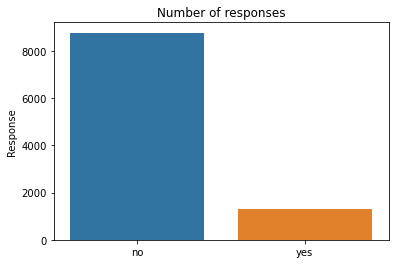

In [96]:
# create figure and axes
# subplots()
fig1, ax1 = plt.subplots()
# set title
# set_title()
ax1.set_title("Number of responses")
# plot the bar chart
# bar()

sns.barplot(x=responses.index ,y =responses)

<b>Show a plot of the response rate by the sales channel.

In [97]:
channel = file4['Sales Channel'].value_counts()

In [98]:
responses_channel = file4.groupby(['Sales Channel'])['Response'].count().reset_index()
responses_channel

,Sales Channel,Response
0,agent,3791
1,branch,2823
2,call center,1979
3,web,1486


<AxesSubplot:title={'center':'Responses by Sales Channel'}, xlabel='Sales Channel', ylabel='Response'>

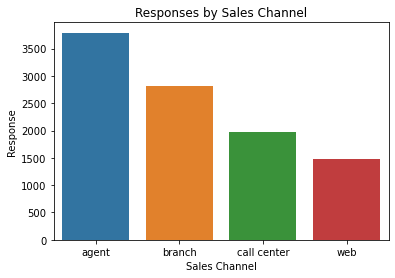

In [99]:
# Start with the usual matplotlib subplots() function
fig2, ax2 = plt.subplots()

# set the title using: set_title()
ax2.set_title("Responses by Sales Channel")

sns.barplot(x = responses_channel['Sales Channel'], y = responses_channel['Response'])

<b>Show a plot of the response rate by the total claim amount.

In [100]:
total_claim = file4['Total Claim Amount'].value_counts()

In [101]:
responses_claim = file4.groupby(['Total Claim Amount'])['Response'].count().reset_index()
responses_claim

,Total Claim Amount,Response
0,0.099007,1
1,0.382107,2
2,0.423310,2
3,0.517753,1
4,0.769185,1
...,...,...
5101,2345.413441,1
5102,2452.894264,1
5103,2552.343856,2
5104,2759.794354,1


<AxesSubplot:title={'center':'Responses by Total Claim Amount'}, xlabel='Total Claim Amount', ylabel='Response'>

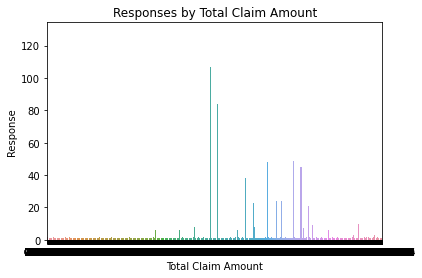

In [102]:
# Start with the usual matplotlib subplots() function
fig3, ax3 = plt.subplots()

# set the title using: set_title()
ax3.set_title("Responses by Total Claim Amount")

sns.barplot(x=responses_claim['Total Claim Amount'], y=responses_claim['Response'])

<b>Show a plot of the response rate by income.

In [103]:
incomes = file4['Income'].value_counts()

In [104]:
responses_income = file4.groupby(['Income'])['Response'].count().reset_index()
responses_income

,Income,Response
0,0,2586
1,10037,1
2,10074,1
3,10097,2
4,10105,1
...,...,...
5689,99875,1
5690,99934,1
5691,99960,1
5692,99961,1


<AxesSubplot:title={'center':'Response Rate by Income'}, xlabel='Response', ylabel='Income'>

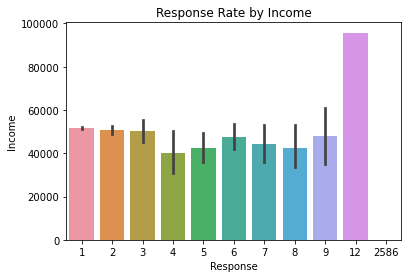

In [105]:
# Start with the usual matplotlib subplots() function
fig4, ax4 = plt.subplots()

# set the title using: set_title()
ax4.set_title("Response Rate by Income")

sns.barplot(y=responses_income['Income'], x=responses_income['Response'])

# Activity 5

<b>Check the data types of the columns. Get the numeric data into dataframe called <code>numerical</code> and <code>categorical</code> columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [106]:
# Check the data types of the columns.

file4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10689 entries, 0 to 10909
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          10689 non-null  object 
 1   Customer Lifetime Value        10689 non-null  float64
 2   Response                       10079 non-null  object 
 3   Coverage                       10689 non-null  object 
 4   Education                      10689 non-null  object 
 5   EmploymentStatus               10689 non-null  object 
 6   Gender                         10689 non-null  object 
 7   Income                         10689 non-null  int64  
 8   Location Code                  10689 non-null  object 
 9   Marital Status                 10689 non-null  object 
 10  Monthly Premium Auto           10689 non-null  int64  
 11  Months Since Policy Inception  10689 non-null  int64  
 12  Number of Open Complaints      10689 non-null 

In [107]:
# Get the numeric data into dataframe called numerical

numerical = file4._get_numeric_data()

In [108]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,52,0.000000,9,292.800000
1,2228.525238,0,64,26,0.000000,1,744.924331
2,14947.917300,22139,100,31,0.000000,2,480.000000
3,22332.439460,49078,97,3,0.000000,2,484.013411
4,9025.067525,23675,117,31,0.384768,7,707.925645
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,40,0.384768,7,1214.400000
10906,5259.444853,61146,65,68,0.000000,6,273.018929
10907,23893.304100,39837,201,63,0.000000,2,381.306996
10908,11971.977650,64195,158,27,4.000000,6,618.288849


In [109]:
# and categorical columns in a dataframe called categoricals.

categoricals = file4.select_dtypes('object')

In [110]:
categoricals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Sales Channel,Vehicle Class,Vehicle Size
0,arizona,no,basic,college,employed,male,suburban,married,corporate auto,corporate l3,agent,four-door car,medsize
1,california,no,basic,college,unemployed,female,suburban,single,personal auto,personal l3,call center,four-door car,medsize
2,washington,no,basic,bachelor,employed,male,suburban,single,personal auto,personal l3,call center,suv,medsize
3,oregon,yes,extended,college,employed,male,suburban,single,corporate auto,corporate l3,branch,four-door car,medsize
4,oregon,no,premium,bachelor,medical leave,female,suburban,married,personal auto,personal l2,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,no,premium,bachelor,unemployed,female,suburban,married,personal auto,personal l1,web,luxury car,medsize
10906,oregon,no,basic,college,employed,female,urban,married,personal auto,personal l3,branch,four-door car,medsize
10907,arizona,no,extended,bachelor,employed,female,rural,married,corporate auto,corporate l3,web,luxury suv,medsize
10908,california,no,premium,college,employed,female,urban,divorced,personal auto,personal l1,branch,suv,medsize


<b>Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables

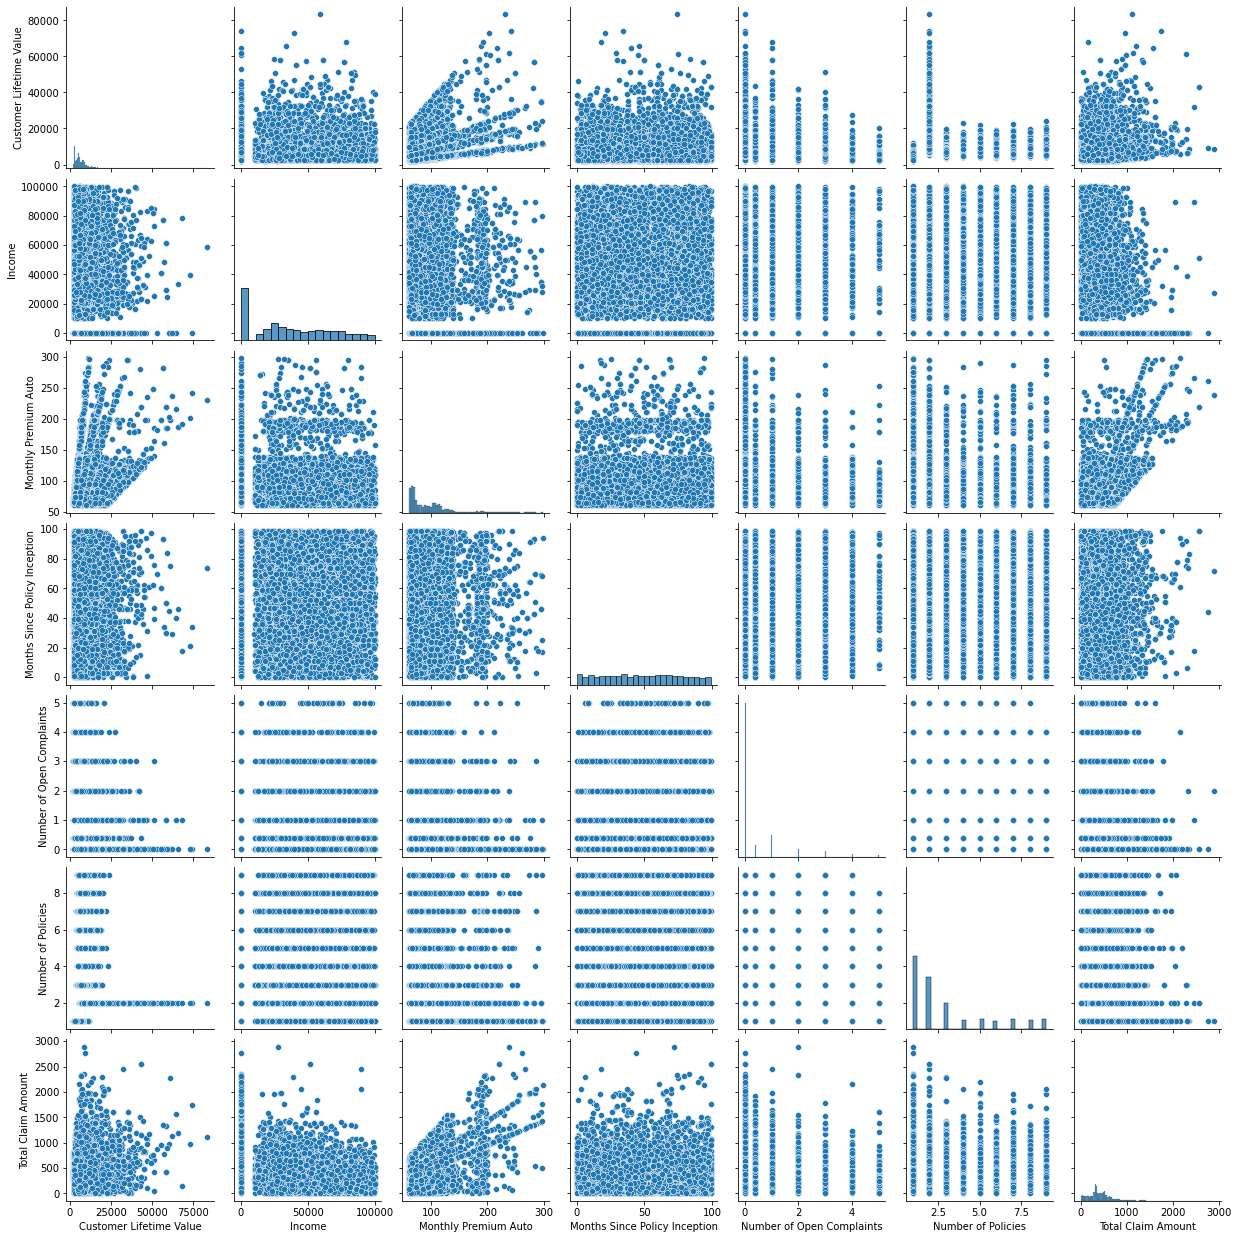

In [111]:
sns.pairplot(numerical) # displays plot pairs for all numeric pair combinations of the dataframe

- Use Matplotlib to construct histograms

array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>,
        <AxesSubplot:title={'center':'Number of Policies'}>],
       [<AxesSubplot:title={'center':'Total Claim Amount'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

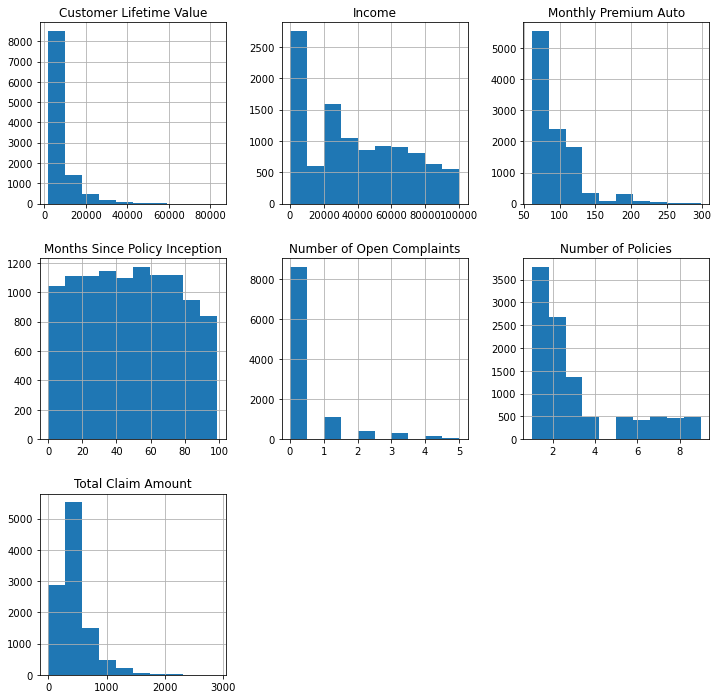

In [112]:
file4.hist(figsize=(12,12)) # creates histograms for all numeric columns of the dataframe 

- Do the distributions for different numerical variables look like a normal distribution?

For 'total_claim_amount' and 'monthly_premium_auto' / 'customer_lifetime_value' it does somehow

Text(0.5, 1.0, 'Customer Lifetime Value vs Total Claim Amount')

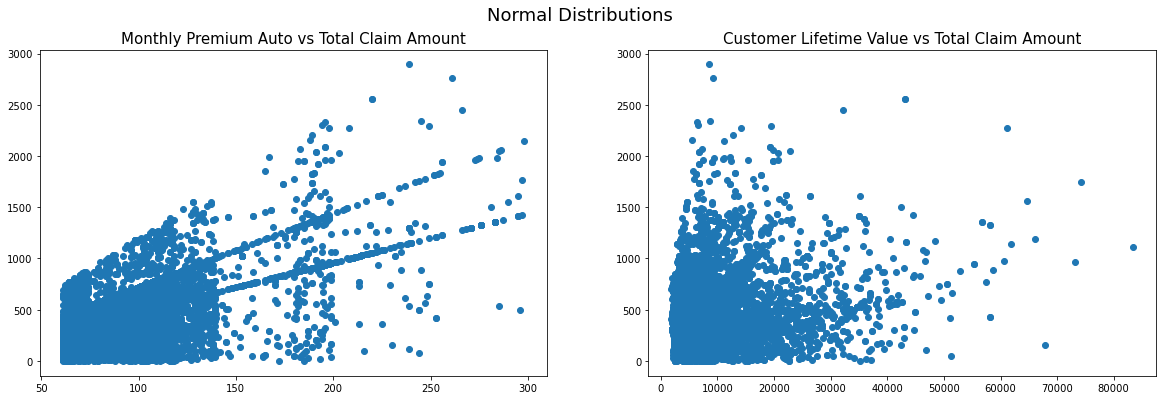

In [113]:
fig5,ax5 = plt.subplots(1,2,figsize = (20,6))

# add an overall title for the figure
fig5.suptitle('Normal Distributions', fontsize=18)

# create first plot (left), adding a title
ax5[0].scatter(x=file4['Monthly Premium Auto'], y=file4['Total Claim Amount'])
ax5[0].set_title('Monthly Premium Auto vs Total Claim Amount', fontsize=15)

# create second plot (right), adding a title
ax5[1].scatter(x=file4['Customer Lifetime Value'], y=file4['Total Claim Amount'])
ax5[1].set_title('Customer Lifetime Value vs Total Claim Amount', fontsize=15)

<b>For the numerical variables, check the multicollinearity between the features. Please note that we will use the column <code>total_claim_amount</code> later as the target variable.

In [114]:
numerical.corr()  # shows matrix for all correlation pairs of the numeric columns of the dataframe 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.027993,0.404234,0.017054,-0.032337,0.016788,0.232843
Income,0.027993,1.000000,-0.009402,-0.006176,0.007861,-0.010742,-0.355240
Monthly Premium Auto,0.404234,-0.009402,1.000000,0.019696,-0.009581,-0.018805,0.630148
Months Since Policy Inception,0.017054,-0.006176,0.019696,1.000000,0.002613,-0.009719,0.004180
Number of Open Complaints,-0.032337,0.007861,-0.009581,0.002613,1.000000,0.001732,-0.011467
Number of Policies,0.016788,-0.010742,-0.018805,-0.009719,0.001732,1.000000,-0.007986
Total Claim Amount,0.232843,-0.355240,0.630148,0.004180,-0.011467,-0.007986,1.000000


<AxesSubplot:>

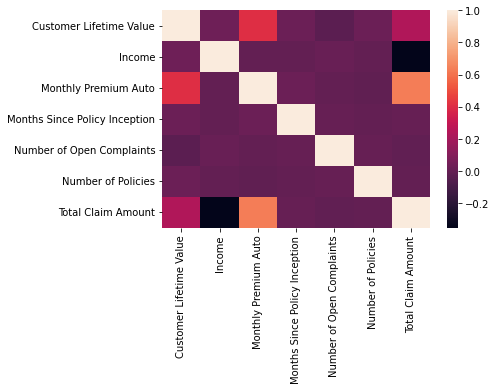

In [115]:
sns.heatmap(numerical.corr())  # shows a heatmap for all correlation pairs of the numeric columns of the dataframe 

<b>Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

Out of my data set I don't see a high correlation (greater than 0.9) between a pair of features. Only the correlation between <code>monthly_premium_auto</code> and <code>total_claim_amount</code> comes close with 0.63. Hence I didn't drop any.

<b>Looking for other correlations...

Assumptions:<br>
    - Correlation btw. Income & Vehicle Class<br>
    - Correlation btw. Income & Sales Channel<br>
    - Correlation btw. Income & Lifetime Value

Check: Correlation btw. Income & Vehicle Class

In [116]:
vclass = file4['Vehicle Class'].value_counts()

In [117]:
vclass

four-door car    5117
two-door car     2074
suv              1981
sports car        533
luxury suv        203
luxury car        186
Name: Vehicle Class, dtype: int64

In [118]:
vclass_income = file4.groupby(['Vehicle Class'])['Income'].sum().reset_index()
vclass_income

,Vehicle Class,Income
0,four-door car,192790149
1,luxury car,6976976
2,luxury suv,7349887
3,sports car,19430379
4,suv,71996776
5,two-door car,80469696


<AxesSubplot:title={'center':'Class by Income'}, xlabel='Vehicle Class', ylabel='Income'>

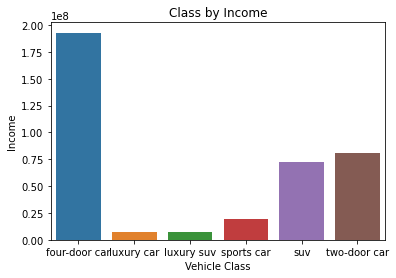

In [119]:
fig6, ax6 = plt.subplots()

# set the title using: set_title()
ax6.set_title("Class by Income")

sns.barplot(y=vclass_income['Income'], x=vclass_income['Vehicle Class'])

# Highly Correlated Columns

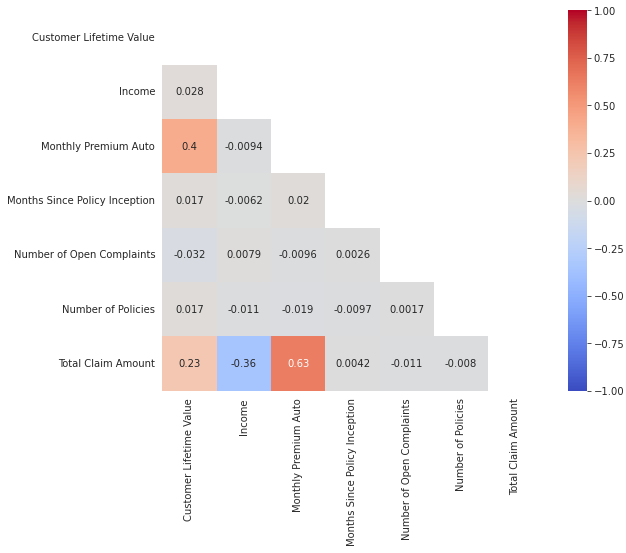

In [120]:
corr = file4.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

<b>Show highly correlated columns (threshold set as >80% )

In [121]:
corr_matrix=file4.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

[]

### dropping highly correlated features

In [689]:
#file4.drop(["monthly_premium_auto"],axis=1,inplace=True)

In [690]:
file4

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,arizona,4809.216960,no,basic,college,employed,male,48029,suburban,married,61,52,0.000000,9,corporate auto,corporate l3,agent,292.800000,four-door car,medsize
1,california,2228.525238,no,basic,college,unemployed,female,0,suburban,single,64,26,0.000000,1,personal auto,personal l3,call center,744.924331,four-door car,medsize
2,washington,14947.917300,no,basic,bachelor,employed,male,22139,suburban,single,100,31,0.000000,2,personal auto,personal l3,call center,480.000000,suv,medsize
3,oregon,22332.439460,yes,extended,college,employed,male,49078,suburban,single,97,3,0.000000,2,corporate auto,corporate l3,branch,484.013411,four-door car,medsize
4,oregon,9025.067525,no,premium,bachelor,medical leave,female,23675,suburban,married,117,31,0.384768,7,personal auto,personal l2,branch,707.925645,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,no,premium,bachelor,unemployed,female,0,suburban,married,253,40,0.384768,7,personal auto,personal l1,web,1214.400000,luxury car,medsize
10906,oregon,5259.444853,no,basic,college,employed,female,61146,urban,married,65,68,0.000000,6,personal auto,personal l3,branch,273.018929,four-door car,medsize
10907,arizona,23893.304100,no,extended,bachelor,employed,female,39837,rural,married,201,63,0.000000,2,corporate auto,corporate l3,web,381.306996,luxury suv,medsize
10908,california,11971.977650,no,premium,college,employed,female,64195,urban,divorced,158,27,4.000000,6,personal auto,personal l1,branch,618.288849,suv,medsize


# Activity 6

# Predictive Modeling

<b>X Y split

In [691]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,52,0.000000,9,292.800000
1,2228.525238,0,64,26,0.000000,1,744.924331
2,14947.917300,22139,100,31,0.000000,2,480.000000
3,22332.439460,49078,97,3,0.000000,2,484.013411
4,9025.067525,23675,117,31,0.384768,7,707.925645
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,40,0.384768,7,1214.400000
10906,5259.444853,61146,65,68,0.000000,6,273.018929
10907,23893.304100,39837,201,63,0.000000,2,381.306996
10908,11971.977650,64195,158,27,4.000000,6,618.288849


<b>Drop the Dependent/Target feature <code>Total Claim Amount</code> from the other numerical features. The target feature we set as <code>y</code> and the remaining ones as <code>x</code>

In [692]:
x=file4.drop('Total Claim Amount', axis=1)
y=file4['Total Claim Amount']

In [693]:
x=x._get_numeric_data()
x

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029,61,52,0.000000,9
1,2228.525238,0,64,26,0.000000,1
2,14947.917300,22139,100,31,0.000000,2
3,22332.439460,49078,97,3,0.000000,2
4,9025.067525,23675,117,31,0.384768,7
...,...,...,...,...,...,...
10905,15563.369440,0,253,40,0.384768,7
10906,5259.444853,61146,65,68,0.000000,6
10907,23893.304100,39837,201,63,0.000000,2
10908,11971.977650,64195,158,27,4.000000,6


<b>Standardize / Normalize (numerical)

StandardScaler

In [694]:
x_scaled=StandardScaler().fit_transform(x)
x_scaled.shape

(10689, 6)

In [695]:
x_scaled

array([[-0.46576765,  0.34535725, -0.93544875,  0.13959941, -0.43507477,
         2.50863436],
       [-0.84101905, -1.23433284, -0.84826859, -0.79119951, -0.43507477,
        -0.82555395],
       [ 1.00847333, -0.50617363,  0.19789327, -0.61219972, -0.43507477,
        -0.40878041],
       ...,
       [ 2.30919781,  0.0759196 ,  3.1329585 ,  0.53339895, -0.43507477,
        -0.40878041],
       [ 0.57575   ,  0.87706247,  1.88337627, -0.75539955,  4.08790643,
         1.25831375],
       [-0.16792946, -1.23433284,  0.22695332, -1.68619847, -0.43507477,
         0.00799313]])

MinMax Scaler

Powertransformer

### One Hot/Label Encoding (categorical)

In [696]:
categoricals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Sales Channel,Vehicle Class,Vehicle Size
0,arizona,no,basic,college,employed,male,suburban,married,corporate auto,corporate l3,agent,four-door car,medsize
1,california,no,basic,college,unemployed,female,suburban,single,personal auto,personal l3,call center,four-door car,medsize
2,washington,no,basic,bachelor,employed,male,suburban,single,personal auto,personal l3,call center,suv,medsize
3,oregon,yes,extended,college,employed,male,suburban,single,corporate auto,corporate l3,branch,four-door car,medsize
4,oregon,no,premium,bachelor,medical leave,female,suburban,married,personal auto,personal l2,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,no,premium,bachelor,unemployed,female,suburban,married,personal auto,personal l1,web,luxury car,medsize
10906,oregon,no,basic,college,employed,female,urban,married,personal auto,personal l3,branch,four-door car,medsize
10907,arizona,no,extended,bachelor,employed,female,rural,married,corporate auto,corporate l3,web,luxury suv,medsize
10908,california,no,premium,college,employed,female,urban,divorced,personal auto,personal l1,branch,suv,medsize


In [697]:
# get dummies pandas
categoricals=pd.get_dummies(categoricals, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [698]:
categoricals

,State_arizona,State_california,State_nevada,State_oregon,State_washington,Response_yes,Coverage_extended,Coverage_premium,Education_college,Education_doctor,...,Sales Channel_branch,Sales Channel_call center,Sales Channel_web,Vehicle Class_luxury car,Vehicle Class_luxury suv,Vehicle Class_sports car,Vehicle Class_suv,Vehicle Class_two-door car,Vehicle Size_medsize,Vehicle Size_small
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,0,0,1,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
10906,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10908,0,1,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,1,0


# Activity 7

## Linear Regression

<b>Train-test split

In [699]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=.20)

In [700]:
x_train

array([[-0.82695319, -1.23433284, -0.87732864,  0.96299845, -0.43507477,
        -0.82555395],
       [-0.44361369, -0.54524735, -0.81920854,  0.06799949, -0.43507477,
         0.84154021],
       [-0.53968044,  1.6794223 ,  0.40131363,  0.3185992 , -0.43507477,
        -0.82555395],
       ...,
       [-0.79562805,  0.16538132, -0.81920854, -0.46899989, -0.43507477,
        -0.82555395],
       [ 2.02544325, -0.36675148, -0.67390828,  1.10619828,  0.        ,
        -0.40878041],
       [-0.51837507, -0.80254847,  0.7209742 , -0.9701993 , -0.43507477,
        -0.82555395]])

# Apply linear regression

### Modeling using Statsmodels

In [701]:
x_train = sm.add_constant(x_train) # adding a constant
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1512.
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:16:25   Log-Likelihood:                -57546.
No. Observations:                8551   AIC:                         1.151e+05
Df Residuals:                    8544   BIC:                         1.152e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.9095      2.191    198.051      0.0

### Modeling using Scikit Learn

In [702]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=.20)

Model fitting

In [703]:
model=LinearRegression()    # model
model.fit(x_train, y_train)   # model train

LinearRegression()

LinearRegression()

In [704]:
model.coef_

array([  -4.19470424, -101.78732514,  184.13845809,   -2.5385361 ,
          0.98810003,   -1.29365189])

Making prediction

In [705]:
y_pred=model.predict(x_test)   # model prediction
##y_pred_train=model.predict(X_train)

In [706]:
y_pred

array([344.94361113, 438.32336587, 197.60636734, ..., 534.74932024,
       229.63658375, 143.78906908])

In [707]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

Text(0.5, 1.0, 'Test Set Residual histogram')

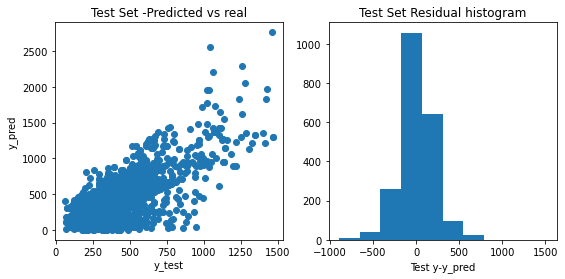

In [708]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

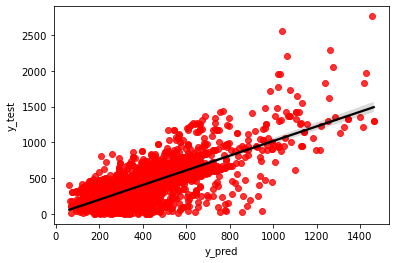

In [709]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

<b>Model Interpretation

## Model Validation

<b>MSE (Mean Squared Error)

In [711]:
# MSE = np.mean( np.power( y - y_pred , 2 ) )

<b>RMSE (Root Mean Squared Error)

In [712]:
# RMSE = np.sqrt(MSE)

<b>MAE (Mean Absolute Error)

In [713]:
# MAE = np.mean( np.abs( y - y_pred ) )

<b>R2